In [1]:
### Import liabraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,recall_score,precision_score,f1_score,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Problem statement

Find out the probabilities of Diabetese having or not based on the following parameter

Glucose,
SkinThickness,
BloodPressure,
Insulin,
BMI,
DiabetesPedigreeFunctionAge

#### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Inabove dataset there are no nan value present and there is no any miscellaneous data present 

### Outlier Handling

<AxesSubplot:>

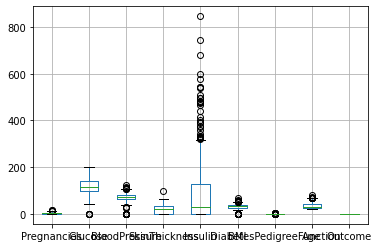

In [7]:
df.boxplot(figsize=(12,6))

<AxesSubplot:>

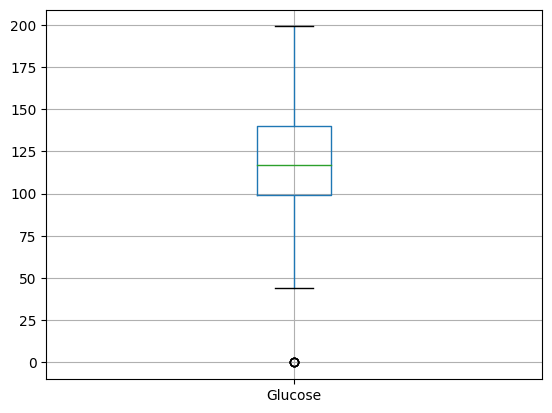

In [8]:
df[["Glucose"]].boxplot()

In [9]:
# use Iqr method to remove outlier

In [10]:
q3=df["Glucose"].quantile(0.75)
q1=df["Glucose"].quantile(0.25)
iqr=q3-q1
lower_limit=q1-1.5*iqr
lower_limit

37.125

In [11]:
df[["Glucose"]].loc[df["Glucose"]<lower_limit]

,Glucose
75,0
182,0
342,0
349,0
502,0


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.loc[df["Glucose"]<lower_limit,"Glucose"]=df["Glucose"].median()

In [14]:
df[["Glucose"]].loc[df["Glucose"]<lower_limit]

,Glucose


<AxesSubplot:>

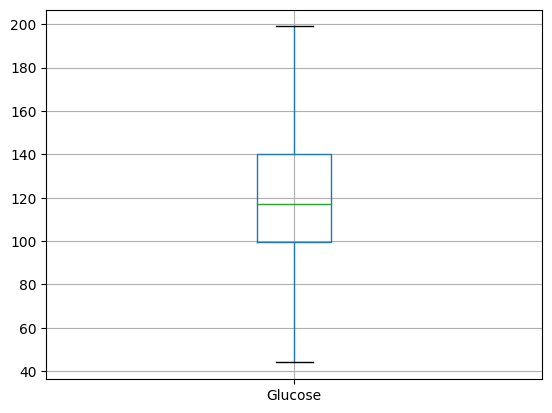

In [15]:
df[["Glucose"]].boxplot()

<AxesSubplot:>

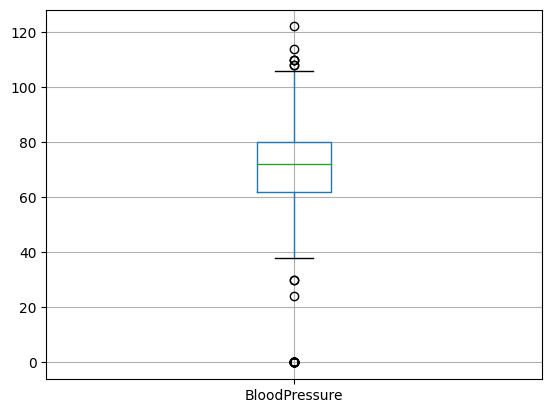

In [16]:
df[["BloodPressure"]].boxplot()

In [17]:
q3=df["BloodPressure"].quantile(0.75)
q1=df["BloodPressure"].quantile(0.25)
iqr=q3-q1
lower_limit=q1-1.5*iqr
lower_limit
upper_limit=q3+1.5*iqr

In [18]:
df[["BloodPressure"]].loc[df["BloodPressure"]>upper_limit]

,BloodPressure
43,110
84,108
106,122
177,110
362,108
549,110
691,114


In [19]:
df[["BloodPressure"]].loc[df["BloodPressure"]<lower_limit].head()

,BloodPressure
7,0
15,0
18,30
49,0
60,0


In [20]:
df.loc[df["BloodPressure"]<lower_limit,"BloodPressure"]=df["BloodPressure"].median()
df.loc[df["BloodPressure"]>upper_limit,"BloodPressure"]=df["BloodPressure"].median()

<AxesSubplot:>

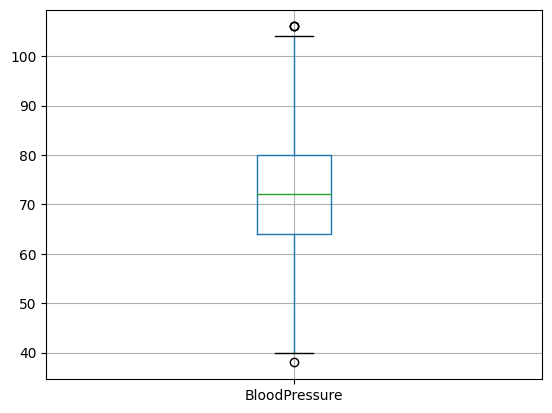

In [21]:
df[["BloodPressure"]].boxplot()

In [22]:
df[["BloodPressure"]].loc[df["BloodPressure"]<lower_limit]

,BloodPressure


In [23]:
df[["BloodPressure"]].loc[df["BloodPressure"]>upper_limit]

,BloodPressure


<AxesSubplot:>

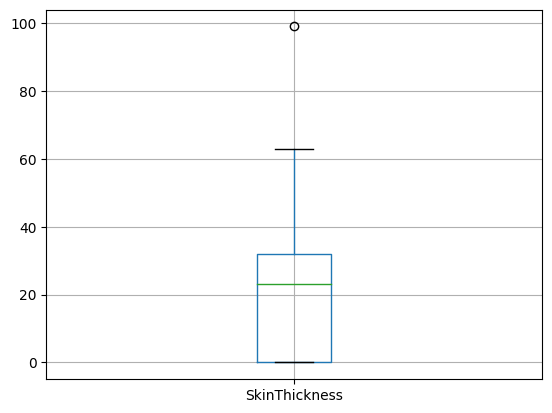

In [24]:
df[["SkinThickness"]].boxplot()

#### Use zscore method

In [25]:
from scipy.stats import zscore
z_score_value=np.abs(zscore(df["SkinThickness"]))
array=np.where(z_score_value>2.5)
array
array1=df["SkinThickness"].to_numpy()
array1[array]

array([63, 99], dtype=int64)

In [26]:
array1[array]=df["SkinThickness"].median()

<AxesSubplot:>

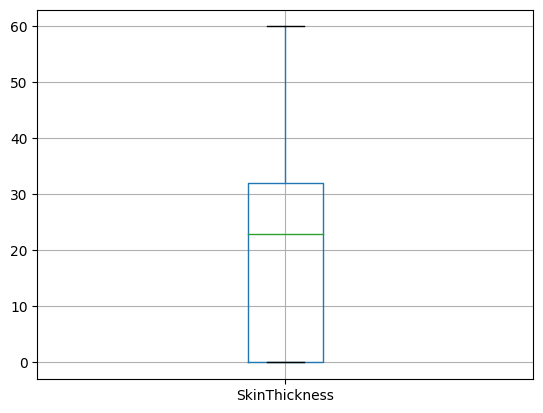

In [27]:
df[["SkinThickness"]].boxplot()

<AxesSubplot:>

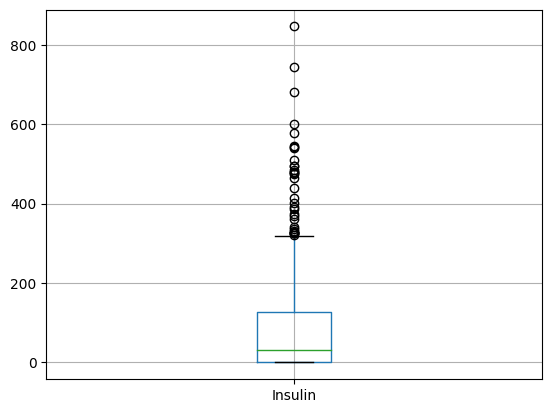

In [28]:
df[["Insulin"]].boxplot()

In [29]:
z_score_value=np.abs(zscore(df["Insulin"]))
array=np.where(z_score_value>2)
array
array1=df["Insulin"].to_numpy()
array1[array]

array([543, 846, 342, 495, 325, 485, 495, 318, 478, 744, 370, 680, 402,
       375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330,
       600, 321, 440, 540, 480, 335, 387, 392, 510], dtype=int64)

In [30]:
array1[array]=df["Insulin"].median()

<AxesSubplot:>

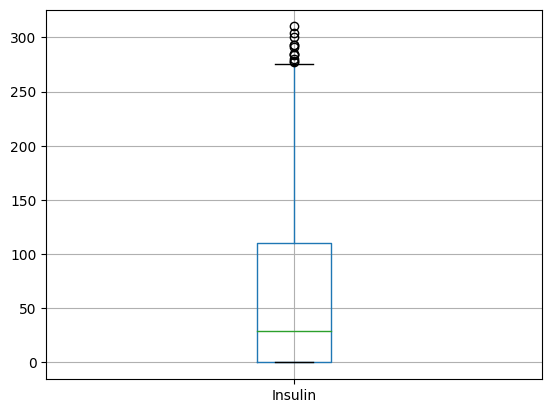

In [31]:
df[["Insulin"]].boxplot()

In [32]:
df["Insulin"].unique()

array([  0,  94, 168,  88,  30, 175, 230,  83,  96, 235, 146, 115, 140,
       110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 304, 142,
       128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,  76, 220,
        40, 152,  18, 135,  37,  51,  99, 145, 225,  49,  50,  92,  63,
       284, 119, 204, 155,  53, 114, 105, 285, 156,  78, 130,  55,  58,
       160, 210,  44, 190, 280,  87, 271, 129, 120,  56,  32,  45, 194,
       258, 150,  67,  57, 116, 278, 122,  75,  74, 182, 215, 184,  42,
       132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73, 108,
        43, 167, 249, 293,  66,  89, 158,  84,  72,  59,  81, 196, 275,
       165, 310,  61, 170, 277,  60,  14,  95, 237, 191, 250, 265, 193,
        79,  86, 188, 106,  65, 166, 274,  77, 126, 185,  25,  41, 272,
       144,  15, 183,  91,  46, 159, 200,  22, 291, 178, 127,  16, 112],
      dtype=int64)

<AxesSubplot:>

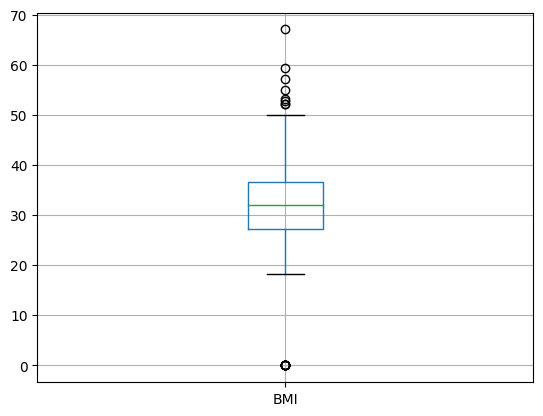

In [33]:
df[["BMI"]].boxplot()

In [34]:
z_score_value=np.abs(zscore(df["BMI"]))
array=np.where(z_score_value>2)
array
array1=df["BMI"].to_numpy()
array1[array]

array([ 0. ,  0. ,  0. ,  0. , 48.8, 49.7, 53.2, 55. ,  0. , 47.9, 50. ,
       67.1, 52.3, 52.3, 52.9, 47.9,  0. , 48.3,  0. , 59.4,  0. ,  0. ,
       57.3, 49.6,  0. ,  0. , 49.3])

In [35]:
array1[array]=df["BMI"].mean()

<AxesSubplot:>

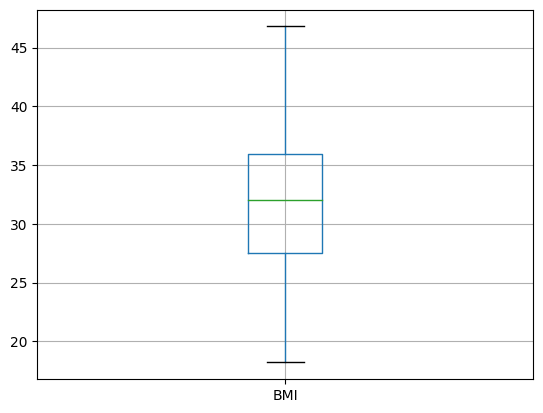

In [36]:
df[["BMI"]].boxplot()

#### use transformation method

<AxesSubplot:xlabel='Age'>

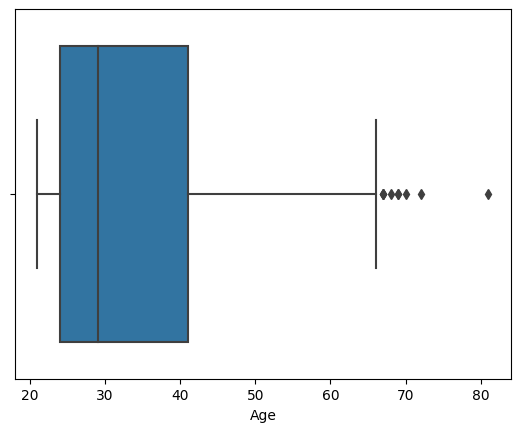

In [37]:
sns.boxplot(x=(df["Age"]))

<AxesSubplot:xlabel='Age'>

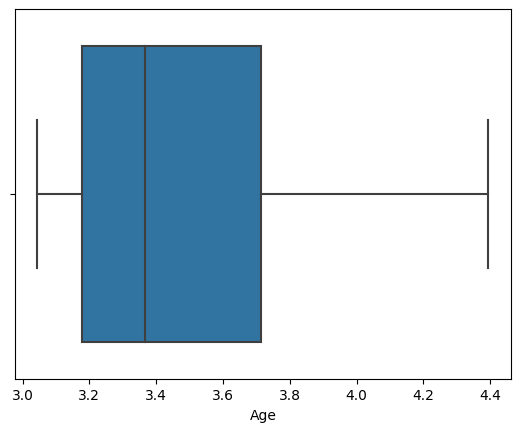

In [38]:
sns.boxplot(x=np.log(df["Age"]))

<AxesSubplot:>

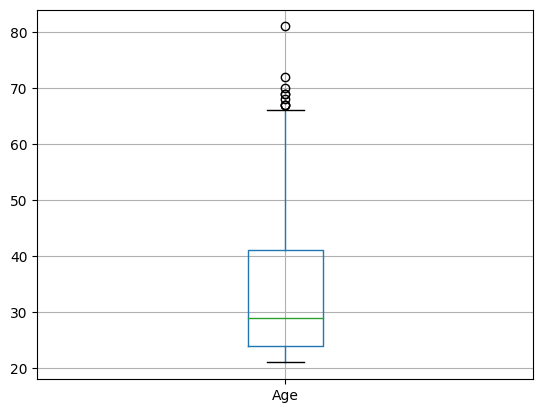

In [39]:
df[["Age"]].boxplot() #here it cannot saved in df so use apply function

In [40]:
df["Age"]=df["Age"].apply(lambda x:np.log(x))

<AxesSubplot:>

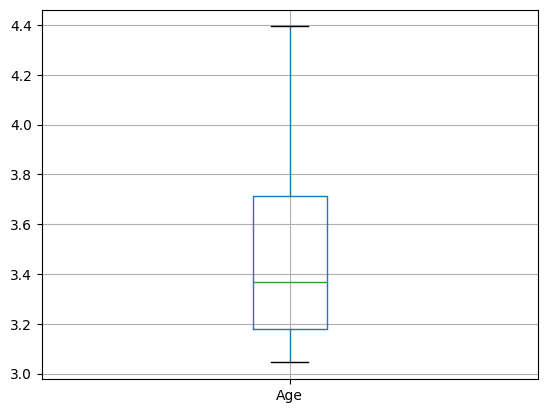

In [41]:
df[["Age"]].boxplot()

<AxesSubplot:>

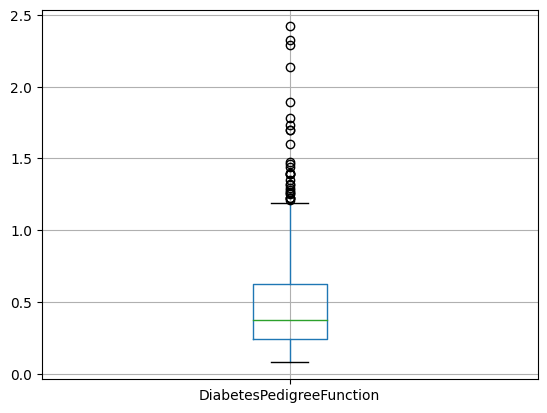

In [42]:
df[["DiabetesPedigreeFunction"]].boxplot()

In [43]:
q3=df["DiabetesPedigreeFunction"].quantile(0.75)
q1=df["DiabetesPedigreeFunction"].quantile(0.25)
iqr=q3-q1
lower_limit=q1-1.5*iqr
lower_limit
upper_limit=q3+1.5*iqr
upper_limit

1.2

In [44]:
df[["DiabetesPedigreeFunction"]].loc[df["DiabetesPedigreeFunction"]>upper_limit].head()

,DiabetesPedigreeFunction
4,2.288
12,1.441
39,1.390
45,1.893
58,1.781


In [45]:
df.loc[df["DiabetesPedigreeFunction"]>upper_limit,"DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].median()

<AxesSubplot:>

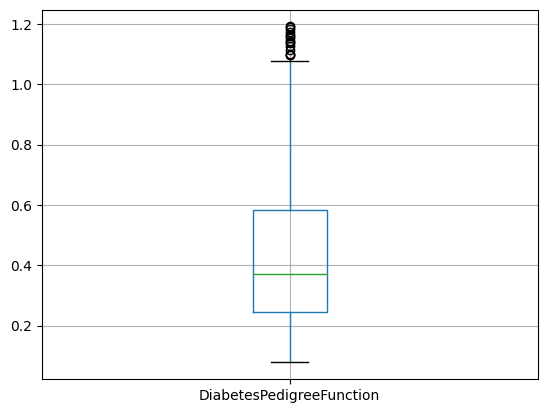

In [46]:
df[["DiabetesPedigreeFunction"]].boxplot()

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.6270,3.912023,1
1,1,85,66,29,0,26.6,0.3510,3.433987,0
2,8,183,64,0,0,23.3,0.6720,3.465736,1
3,1,89,66,23,94,28.1,0.1670,3.044522,0
4,0,137,40,35,168,43.1,0.3725,3.496508,1


In [48]:
x=df.drop(["Outcome","Pregnancies"],axis=1)
y=df["Outcome"]

<AxesSubplot:>

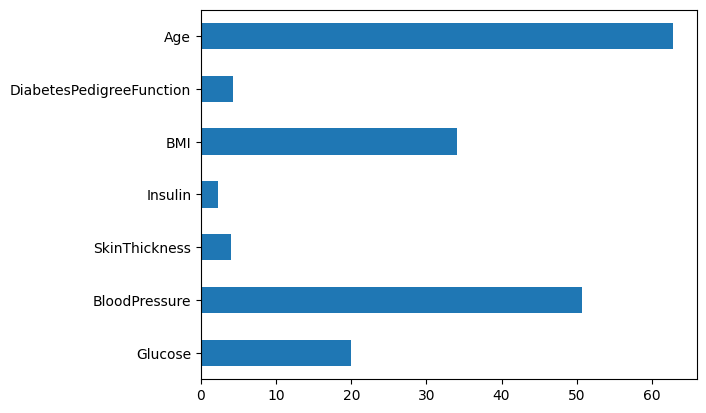

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
lst=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    lst.append(vif)
    
lst
s1=pd.Series(lst,index=x.columns)
s1.plot(kind="barh")

### Train test split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3,random_state=10,stratify=y)

### Model training

In [51]:
logistic_model=LogisticRegression()

In [52]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=logistic_model.predict(x_test)

In [54]:
y_pred
dfnew2=pd.DataFrame()
dfnew2["prediction"]=y_pred
dfnew2.shape



(231, 1)

In [55]:
y_pred_pobability=logistic_model.predict_proba(x_test)
y_pred_pobability.shape

(231, 2)

In [56]:
s1=pd.DataFrame(y_pred_pobability,columns=["class0","class1"])
s1["actual"]=y_pred

In [57]:
# s1["class2"].unique()

<AxesSubplot:>

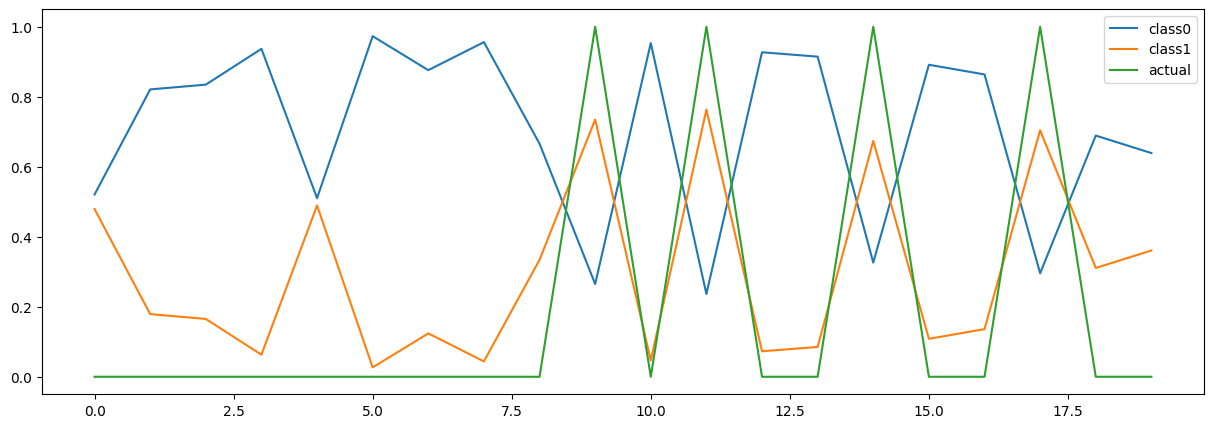

In [58]:
s1.head(20).plot(kind="line",figsize=(15,5))

In [59]:
s1.tail(25)

,class0,class1,actual
206,0.843269,0.156731,0
207,0.641701,0.358299,0
208,0.960697,0.039303,0
209,0.818876,0.181124,0
210,0.905527,0.094473,0
211,0.815571,0.184429,0
212,0.935264,0.064736,0
213,0.841556,0.158444,0
214,0.519774,0.480226,0
215,0.786350,0.213650,0


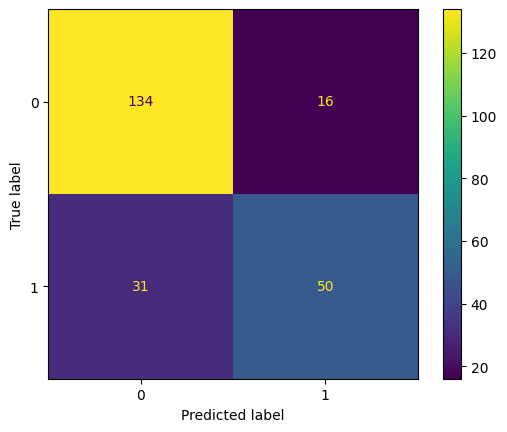

In [60]:
confusion_matrix_test=plot_confusion_matrix(logistic_model,x_test,y_test)

In [61]:
y_pred_train=logistic_model.predict(x_train)

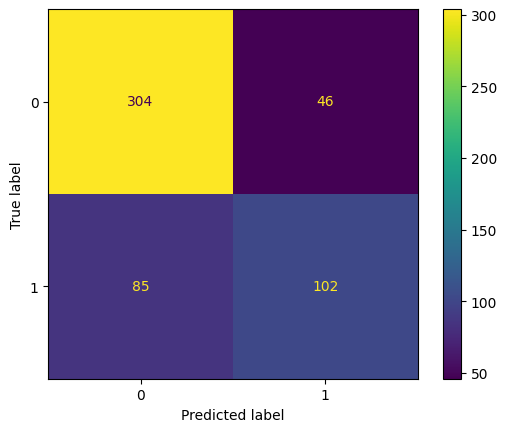

In [62]:
confusion_matrix_train=plot_confusion_matrix(logistic_model,x_train,y_train)

### Evaluation of matrix

In [63]:
con_matrix_test=confusion_matrix(y_test,y_pred)
print("confusion matrix for test\n",con_matrix_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy of testing is",accuracy)

classification_report_test=classification_report(y_test,y_pred)
print("classification report is\n",classification_report_test)

confusion matrix for test
 [[134  16]
 [ 31  50]]
accuracy of testing is 0.7965367965367965
classification report is
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



#### for training data

In [64]:
con_matrix_train=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for test\n",con_matrix_train)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy of testing is",accuracy)

classification_report_train=classification_report(y_train,y_pred_train)
print("classification report is\n",classification_report_train)

confusion matrix for test
 [[304  46]
 [ 85 102]]
accuracy of testing is 0.7560521415270018
classification report is
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.69      0.55      0.61       187

    accuracy                           0.76       537
   macro avg       0.74      0.71      0.72       537
weighted avg       0.75      0.76      0.75       537



### AUC & ROC curve

In [65]:
y_train_probability=logistic_model.predict_proba(x_train)
y_train_probability[:,1]
fpr,tpr,thresh =roc_curve(y_train,y_train_probability[:,1])
s2=pd.DataFrame()
s2["fpr"]=fpr
s2["tpr"]=tpr
s2["thresh"]=thresh
s2

,fpr,tpr,thresh
0,0.000000,0.000000,1.967878
1,0.000000,0.005348,0.967878
2,0.002857,0.005348,0.963759
3,0.002857,0.053476,0.903074
4,0.005714,0.053476,0.902163
...,...,...,...
176,0.737143,0.983957,0.094035
177,0.737143,0.989305,0.093891
178,0.777143,0.989305,0.085711
179,0.777143,1.000000,0.084695


Text(0.5, 1.0, 'Roc_curve')

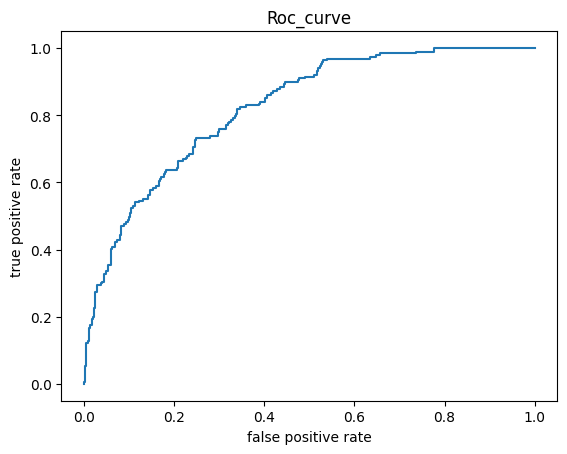

In [66]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc_curve")

### calculate AUC curve

In [67]:
AUC_VALUE=auc(fpr,tpr)
AUC_VALUE    # for best model auc value is between 0.8 to 0.9

0.8220473644003056

### USER INPUT 

In [68]:
x.columns


Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [69]:
x.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,3.912023
1,85,66,29,0,26.6,0.351,3.433987


In [70]:
Glucose=85
BloodPressure=66
SkinThickness=29
Insulin=0
BMI=26.6
DiabetesPedigreeFunction=0.351
Age=31


In [71]:
array=np.zeros(x.shape[1])
array[0]=Glucose
array[1]=BloodPressure
array[2]=SkinThickness
array[3]=Insulin
array[4]=BMI
array[5]=DiabetesPedigreeFunction
array[6]=np.log(Age)
array

array([85.       , 66.       , 29.       ,  0.       , 26.6      ,
        0.351    ,  3.4339872])

In [72]:
prediction=logistic_model.predict([array])[0]
if prediction==1:
    print("patient having the diabetes need to take care")
else:
    print("patient dont have the diabetes enjoy")

patient dont have the diabetes enjoy


### Pickle file

In [73]:
column_list=x.columns
column_list

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [74]:
column_dict={"columns":list(column_list)}

In [75]:
import pickle
import json

In [78]:
with open("logistic_model.pkl","wb")as f:
    pickle.dump(logistic_model,f)

In [77]:
with open("dict.json","w")as f:
    json.dump(column_dict,f)